In [1]:
from math import pi
import matplotlib.pyplot as plt
from pennylane import numpy as np
import pennylane as qml
from pennylane.optimize import AdamOptimizer
import datetime
now=datetime.datetime.now

In [2]:
num_qubits=1
dev=qml.device('default.qubit', wires=num_qubits)
seed = 40
np.random.seed(seed)

In [3]:
t=np.linspace(-10, 10, 10)

In [4]:
@qml.qnode(dev, diff_method="backprop", interface="autograd")
def hepler(encoded_x,theta):
    qml.QubitStateVector(encoded_x,wires=[0])
    qml.RY(wires=0,phi=theta)
    return qml.probs(wires=[0])

In [5]:
def encoder(x):
    vector_x = [1,x]
    norm_x = np.linalg.norm(vector_x)
    return vector_x/norm_x , norm_x

In [6]:

def f(x,theta,w):
    encoded_x,norm_x = encoder(x)
    f_val = hepler(encoded_x,theta)
    # rescale_coef = abs(w[0])
    rescale_coef = w[0]
    return (f_val[1]*(norm_x**2))*rescale_coef+w[1]
    # print(qml.draw(hepler)(encoded_x))

In [7]:
# f(-1.7)

In [8]:
def f_test(t):
    return 4*t**3-5*t**2-20*t-10

In [9]:
def callbackF(parameters):
    # global current_loss

    print("Current loss:", cost(parameters)) 


def cost(params):
    global theta
    global w
    # Reshape the flattened theta back to its original shape
    theta_shape = theta.shape
    w_shape = w.shape
    w, theta_flat = params[:2], params[2:]
    theta = theta_flat.reshape(theta_shape)
    loss = 0
    for x in t:
        loss += (f(x,theta[0],w)-f_test(x))**2/len(t)
    
    # print(w)
    # print(theta)
    # raise KeyError
    return loss

In [10]:
import numpy as np
from scipy.optimize import minimize



theta = np.random.uniform(0, 2 * np.pi, size=(1))
w = np.zeros(2)

initial_params = np.concatenate([w, theta.flatten()])  # Flatten theta to a 1D array

result = minimize(cost, initial_params, callback=callbackF, method='BFGS', options={'gtol': 1E-2})
# Extract the optimized parameters
w, theta_flat = result.x[:2], result.x[2:]
theta = theta_flat.reshape(theta.shape)

Current loss: 3452248.699896493
Current loss: 3362435.77272116
Current loss: 2633281.0234185373
Current loss: 2484657.8932006736
Current loss: 2242463.2462151498
Current loss: 2007355.4473906853
Current loss: 1967617.5785853886
Current loss: 1891453.9312955837
Current loss: 1752243.6146909355
Current loss: 1522336.5361303808
Current loss: 1281141.0507958736
Current loss: 1162726.459971696
Current loss: 1049544.7723278683
Current loss: 971733.7442433673
Current loss: 897782.2159828908
Current loss: 865632.8512573375
Current loss: 814771.9883904476
Current loss: 768865.8665563728
Current loss: 744554.5042813543
Current loss: 736393.0376331562
Current loss: 723224.6905429517
Current loss: 704958.4406646894
Current loss: 699869.4470167942
Current loss: 692199.135254435
Current loss: 681508.7520545665
Current loss: 677914.4548175125
Current loss: 672727.0480368452
Current loss: 666153.7017098845
Current loss: 663299.5689754292
Current loss: 661987.6549055731
Current loss: 659799.6735512321


In [11]:
print(w)

[ 56364.51955055 -56589.90900904]


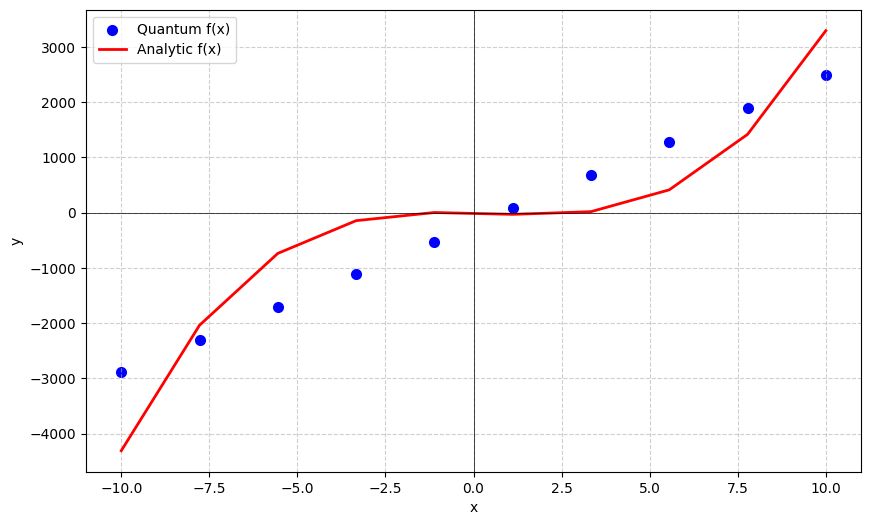

In [12]:

# Calculate corresponding y values for both functions
y1 = [f(x,theta[0],w) for x in t]
y2 = [f_test(x) for x in t]


# Create the plot
plt.figure(figsize=(10, 6))  # Set the figure size
plt.scatter(t, y1, label='Quantum f(x)', linewidth=2, color='b')  # Plot the first function
plt.plot(t, y2, label='Analytic f(x)', linewidth=2, color='r')  # Plot the second function
plt.xlabel('x')  # X-axis label
plt.ylabel('y')  # Y-axis label
# plt.title('Plot of Two Functions')  # Title of the plot
plt.grid(True, linestyle='--', alpha=0.6)  # Add a grid
plt.legend()  # Show the legend
plt.axhline(0, color='black', linewidth=0.5)  # Add horizontal line at y=0
plt.axvline(0, color='black', linewidth=0.5)  # Add vertical line at x=0
# plt.ylim([-5, 10])  # Set y-axis limits
